Illustration of the issues with the confidence interval for binomial using Wald and Fisher information

In [1]:
trials<-1000
n<-100
p<-0.1 # make this smaller to see the CI % get farther off
#rbinom(100,100,.2) draws from Bin(n,p) ten times
x<-rbinom(trials,n,p)

In [2]:
#x;

In [3]:
phat = x/n # the MLEs in each case

In [4]:
FI = n/(phat*(1-phat)) # the vector of Fisher Informations
#FI

In [5]:
varhat = 1/FI # the vector of estimated variances for the mle

In [6]:
#varhat

Now we compute the vectors of lower and upper bounds of our confidence intervals

In [7]:
lower = phat - 1.96*sqrt(varhat)

In [8]:
upper = phat + 1.96*sqrt(varhat)

If this is a good CI, the next number should converge to .95 as trials $\rightarrow \infty$

In [9]:
sum(lower< p & p<upper)/trials 

[1] 0.922

In [10]:
meta = 10000
metatrials = rep(0,meta);
for(i in 0:meta)
{
  x<-rbinom(trials,n,p);
  phat = x/n;
  FI = n/(phat*(1-phat));
  varhat = 1/FI;
  lower = phat - 1.96*sqrt(varhat);
  upper = phat + 1.96*sqrt(varhat);
  inthere = sum(lower< p & p<upper)/trials ;
  metatrials[i]=inthere;
}

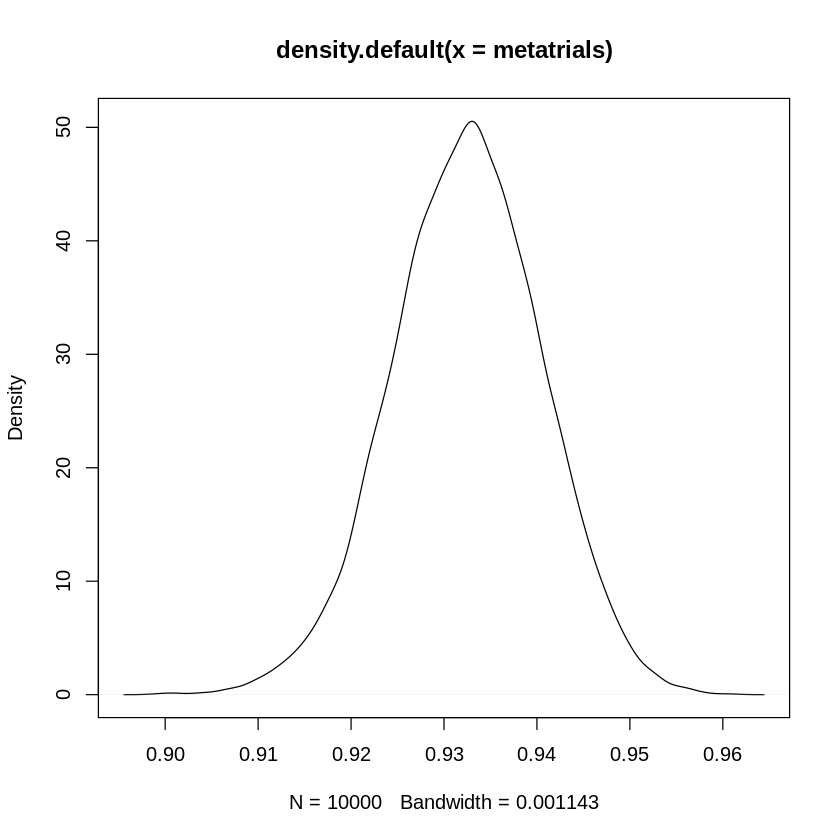

In [11]:
plot(density(metatrials))

Notice our 95% CI doesn't work as advertised.